In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/g2net-detecting-continuous-gravitational-waves/sample_submission.csv
/kaggle/input/g2net-detecting-continuous-gravitational-waves/train_labels.csv
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/518949f96.hdf5
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/bf06b17c8.hdf5
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/c24c73851.hdf5
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/42a3b2de1.hdf5
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/7c654565d.hdf5
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/b3d086b3e.hdf5
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/4ec4b6776.hdf5
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/1031d1f36.hdf5
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/03b599d01.hdf5
/kaggle/input/g2net-detecting-continuous-gravitational-waves/test/82ebf844f.hdf5
/kaggle/input/g2net-detecting

In [15]:
%%capture
!pip install nexusformat

In [16]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import random
import h5py
import nexusformat.nexus as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
DATA_PATH = Path('../input/g2net-detecting-continuous-gravitational-waves')
TRAIN_PATH = DATA_PATH/'train'
TEST_PATH = DATA_PATH/'test'
train_example_with_signal_path = TRAIN_PATH/'cc561e4fc.hdf5'
train_example_without_signal_path = TRAIN_PATH/'fb6db0d08.hdf5'

In [18]:
with h5py.File(train_example_with_signal_path, "r") as f:
    ID_key = list(f.keys())[0]
    print(f"ID: {ID_key} \n")

ID: cc561e4fc 



In [19]:
# f.visitsitems() recursively visits all objects in the file and applies a user-defined function to each object 

def print_name_and_type(name, obj):
    print(name, type(obj))
    
with h5py.File(train_example_with_signal_path, "r") as f:
    f.visititems(print_name_and_type)
    f.close

cc561e4fc <class 'h5py._hl.group.Group'>
cc561e4fc/H1 <class 'h5py._hl.group.Group'>
cc561e4fc/H1/SFTs <class 'h5py._hl.dataset.Dataset'>
cc561e4fc/H1/timestamps_GPS <class 'h5py._hl.dataset.Dataset'>
cc561e4fc/L1 <class 'h5py._hl.group.Group'>
cc561e4fc/L1/SFTs <class 'h5py._hl.dataset.Dataset'>
cc561e4fc/L1/timestamps_GPS <class 'h5py._hl.dataset.Dataset'>
cc561e4fc/frequency_Hz <class 'h5py._hl.dataset.Dataset'>


#### Disclaimer: generated by chatGPT

In h5py, `keys()`, `values()`, and `items()` are functions that can be used to get information about the groups and datasets contained within an HDF5 file. Here is the difference between these functions using an example:

Suppose we have an HDF5 file `example.h5` containing the following groups and datasets:

```
example.h5
├── group1
│   ├── dataset1
│   └── dataset2
└── group2
    ├── subgroup1
    │   ├── dataset3
    │   └── dataset4
    └── dataset5
```

- `keys()`: This function returns a list of the names of all the groups and datasets that are immediate children of the current group. For example, to get a list of the names of the groups and datasets in the root group of `example.h5`, you can use the following code:

  ```python
  import h5py
  
  with h5py.File('example.h5', 'r') as f:
      root_keys = list(f.keys())
      
  print(root_keys)
  # Output: ['group1', 'group2']
  ```

  This returns a list of the names of the immediate child groups of the root group, which are `'group1'` and `'group2'`.

- `values()`: This function returns a list of the objects that are immediate children of the current group. For example, to get a list of the objects in the root group of `example.h5`, you can use the following code:

  ```python
  import h5py
  
  with h5py.File('example.h5', 'r') as f:
      root_values = list(f.values())
      
  print(root_values)
  # Output: [<HDF5 group "group1" (2 members)>, <HDF5 group "group2" (3 members)>]
  ```

  This returns a list of the objects that are immediate children of the root group, which are the `'group1'` and `'group2'` groups.

- `items()`: This function returns a list of tuples containing the name and object of each immediate child of the current group. For example, to get a list of the names and objects of the groups and datasets in the root group of `example.h5`, you can use the following code:

  ```python
  import h5py
  
  with h5py.File('example.h5', 'r') as f:
      root_items = list(f.items())
      
  print(root_items)
  # Output: [('group1', <HDF5 group "group1" (2 members)>), ('group2', <HDF5 group "group2" (3 members)>)]
  ```

  This returns a list of tuples, where each tuple contains the name of an immediate child of the root group and its corresponding object.

These functions can be useful for exploring the structure of an HDF5 file and navigating to the groups and datasets of interest.

In [20]:
with h5py.File(train_example_with_signal_path, "r") as f:
    
    # get first object name/key; this is the data point ID
    ID_key = list(f.keys())[0]
    print(f"ID: {ID_key} \n")
    print(list(f[ID_key].keys()), "\n")
    
    # Retrieve the Livingston decector data
    print(f"- {list(f[ID_key].keys())[1]}")
    L1_SFTs = f[ID_key]['L1']['SFTs']
    print(f"-- SFTs amplitudes: {L1_SFTs.shape}")
    L1_ts = f[ID_key]['L1']['timestamps_GPS']
    print(f"-- timestamps: {L1_ts.shape} \n")
    
    # Retrieve the Hanford decector data
    print(f"- {list(f[ID_key].keys())[0]}")
    H1_SFTs = f[ID_key]['H1']['SFTs']
    print(f"-- SFTs amplitudes: {H1_SFTs.shape}")
    H1_ts = f[ID_key]['H1']['timestamps_GPS']
    print(f"-- timestamps: {H1_ts.shape} \n")

#     # Retrieve the frequency data
    freq_data = np.array(f[ID_key]['frequency_Hz'])
    print(f"- Frequency data: {freq_data.shape} \n")

ID: cc561e4fc 

['H1', 'L1', 'frequency_Hz'] 

- L1
-- SFTs amplitudes: (360, 4655)
-- timestamps: (4655,) 

- H1
-- SFTs amplitudes: (360, 4570)
-- timestamps: (4570,) 

- Frequency data: (360,) 



In [21]:
train_labels = pd.read_csv(DATA_PATH/'train_labels.csv')
train_labels.head(10)

id  target
0  001121a05       1
1  004f23b2d       1
2  00a6db666       1
3  00f36a6ac       1
4  010a387db       1
5  0197bacf8       1
6  01b8b67f3       1
7  01bcf6533       0
8  01dba9731       1
9  021248995       1

The below plot clearly shows that the test train split is 13:1 and the organiser recomend generating our own data

[Generating continuous gravitational-wave signals](https://www.kaggle.com/code/rodrigotenorio/generating-continuous-gravitational-wave-signals)

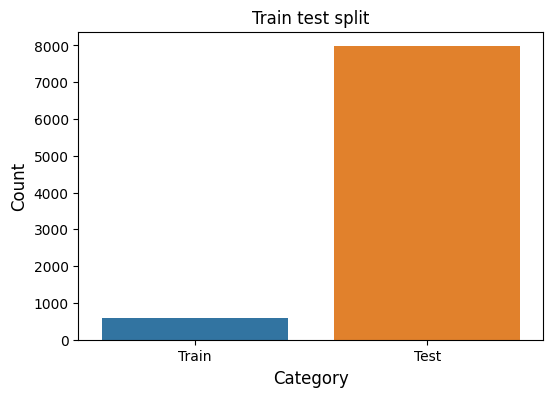

 Ratio of Test to Train split: 13.225538971807628


In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Train', 'Test'], y=[len(os.listdir(TRAIN_PATH)), len(os.listdir(TEST_PATH))]);
plt.title(f'Train test split', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()
print(f" Ratio of Test to Train split: {len(os.listdir(TEST_PATH))/len(os.listdir(TRAIN_PATH))}")

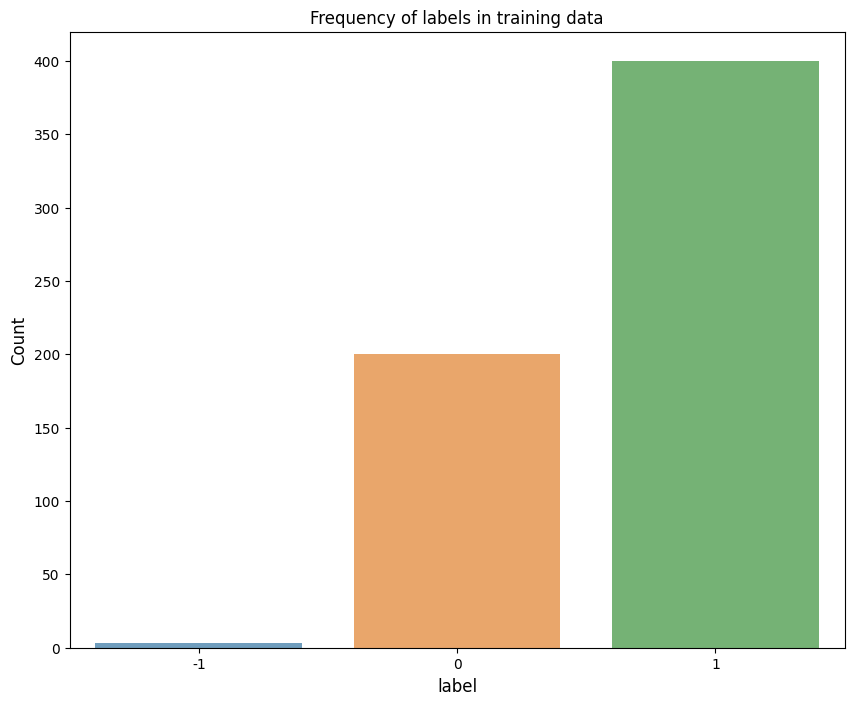

In [23]:
### Plot the distribution of labels ###
label_count  = train_labels['target'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=label_count.index, y=label_count.values, alpha=0.7)
plt.title(f'Frequency of labels in training data', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('label', fontsize=12)
plt.show()

In [24]:
# Probabilist value between [0, 1] suggesting if the prediction is GW or not
pd.read_csv(DATA_PATH/'sample_submission.csv').head(10)

id  target
0  00054c878     0.5
1  0007285a3     0.5
2  00076c5a6     0.5
3  001349290     0.5
4  001a52e92     0.5
5  00222d97b     0.5
6  00249c302     0.5
7  0026862ce     0.5
8  00368b973     0.5
9  003b7a1e9     0.5

In [25]:
'''
    Extracts data from hdf5 file and puts it into a dict. It also adds the label
'''
def extract_data_from_hdf5(path, labels):
    data = {}
    with h5py.File(path, "r") as f:
        ID_key = list(f.keys())[0]

        # Frequency data
        data['freq'] = np.array(f[ID_key]['frequency_Hz'])

        # Livingston decector data
        data['L1_SFTs_amplitudes'] = np.array(f[ID_key]['L1']['SFTs'])
        data['L1_ts'] = np.array(f[ID_key]['L1']['timestamps_GPS'])

        # Hanford decector data
        data['H1_SFTs_amplitudes'] = np.array(f[ID_key]['H1']['SFTs'])
        data['H1_ts'] = np.array(f[ID_key]['H1']['timestamps_GPS'])
        
        # Get label from training labels if in training set
        data['label'] = labels.loc[labels.id==ID_key].target.item()
        
    return data
    

In [26]:
'''
    Re & Im amplitudes of the SFTs as spectograms for both detectors
'''
def plot_spectograms(data):
    fig, ax = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f"Label {data['label']}")

    for ind, detector in enumerate(['L1', 'H1']):
        ax[ind][0].set(xlabel="Timestamps [GPS]",
                         ylabel="Frequency [Hz]",
                         title=f"{detector} - Real part")
        ax[ind][1].set(xlabel="Timestamps [GPS]",
                         ylabel="Frequency [Hz]",
                         title=f"{detector} - Imaginary part")
        
        
        c0 = ax[ind][0].pcolormesh(data[f"{detector}_ts"], data['freq'],
                                     data[f"{detector}_SFTs_amplitudes"].real)
        c1 = ax[ind][1].pcolormesh(data[f"{detector}_ts"], data['freq'],
                                     data[f"{detector}_SFTs_amplitudes"].imag)
    
        fig.colorbar(c0, ax=ax[ind][0])
        fig.colorbar(c1, ax=ax[ind][1])
        
    plt.show()

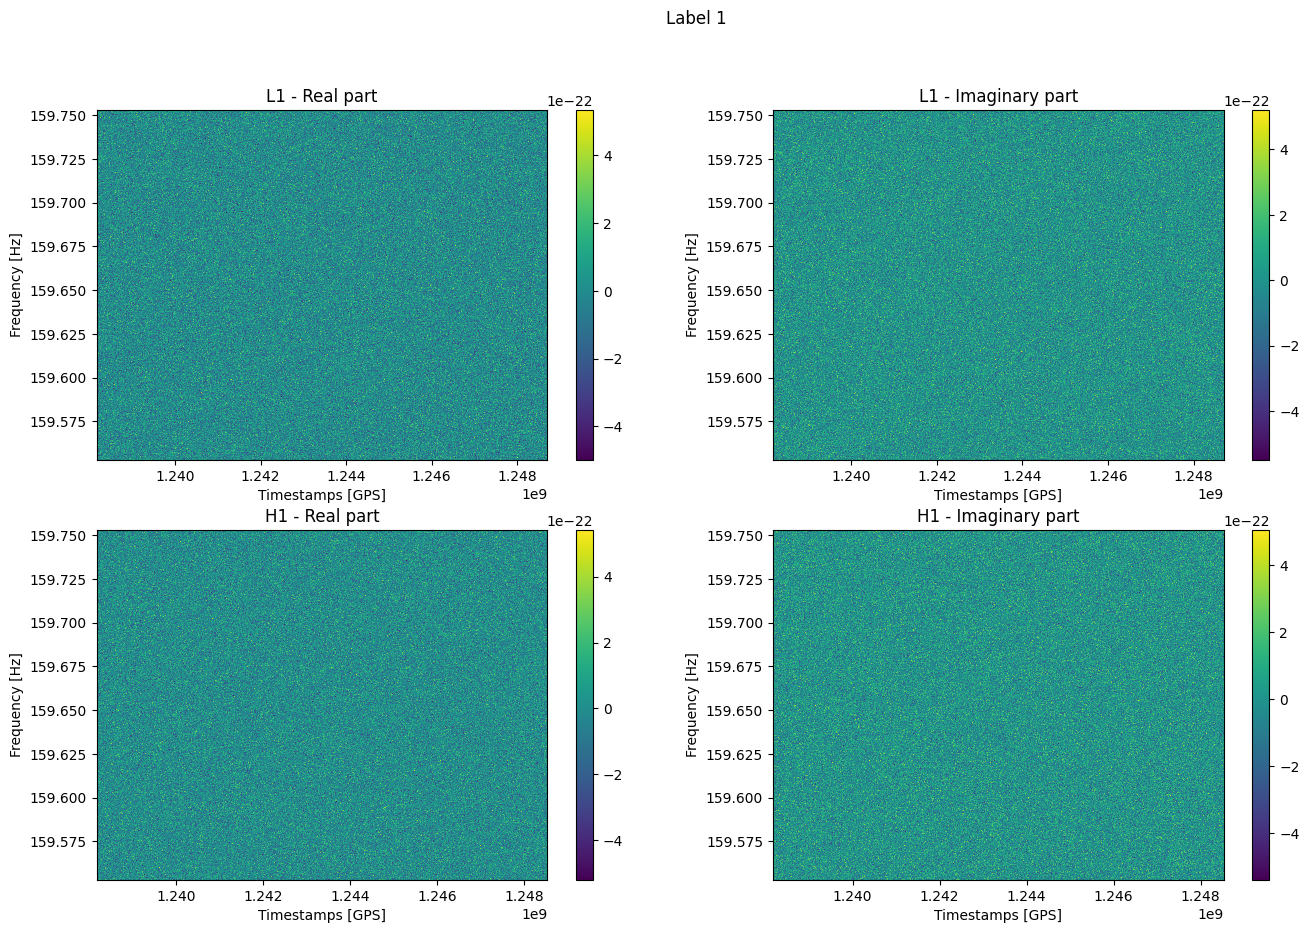

In [27]:
sns.reset_orig() # Reset seaborn theme (otherwise these plots come out red 😅)
data = extract_data_from_hdf5(train_example_with_signal_path, train_labels)
plot_spectograms(data)

# Turns out, the plot isn't wrong. It is just hard to notice the difference between the plots

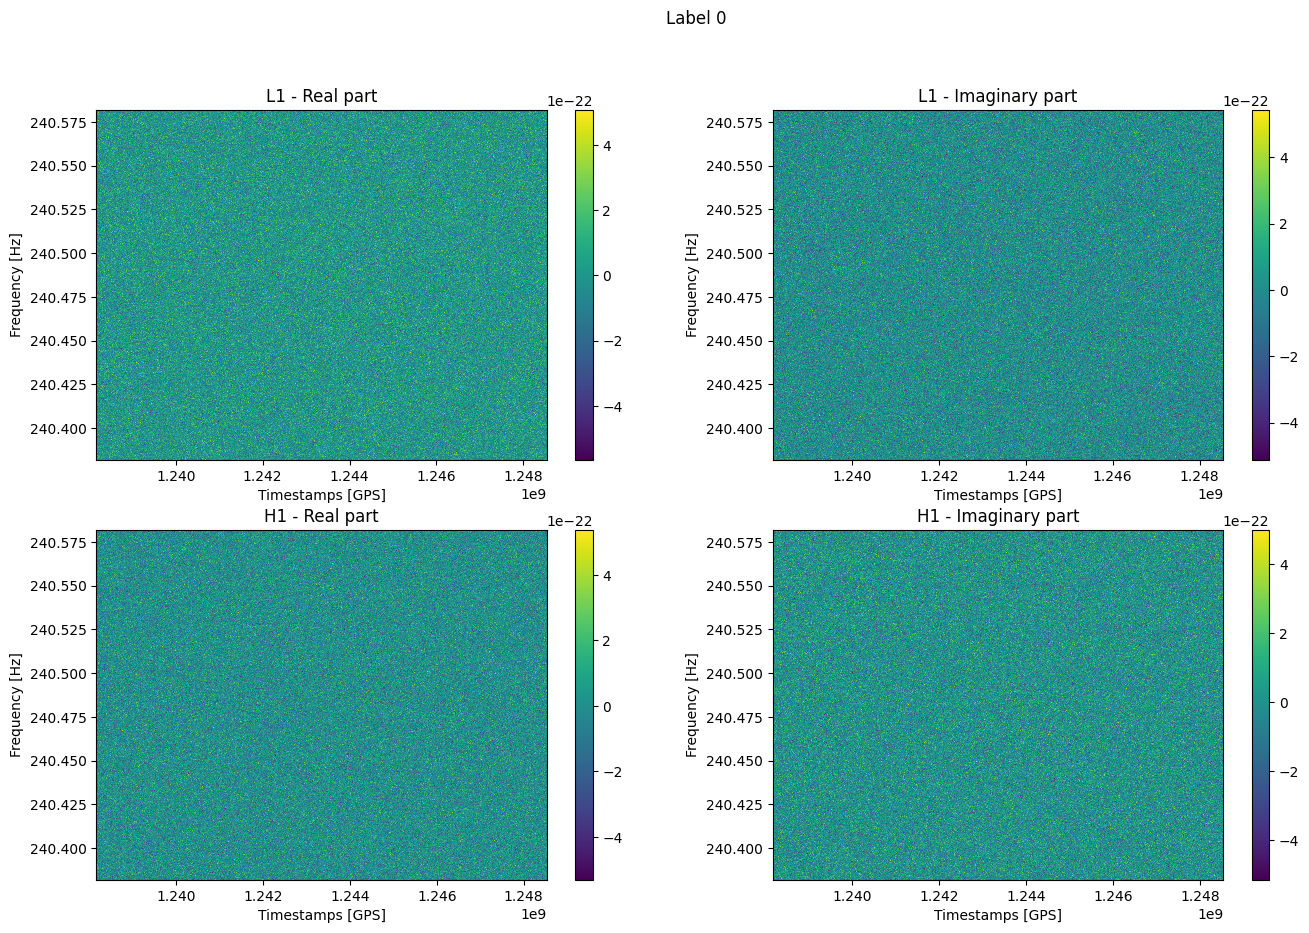

In [29]:
data = extract_data_from_hdf5(train_example_without_signal_path, train_labels)
plot_spectograms(data)

## Timestamp Analysis

In [31]:
from tqdm.notebook import tqdm
H1_timestamps, L1_timestamps, start_diff, labels, freq = ([] for i in range(5))

for p in tqdm(os.listdir(TRAIN_PATH), total=len(os.listdir(TRAIN_PATH))):
    id_ = p.split('.')[0]
    labels.append(train_labels.loc[train_labels.id==id_].target.item())
    data = extract_data_from_hdf5(DATA_PATH/'train'/p, train_labels)
    L1_timestamps.append(data['L1_ts'])
    H1_timestamps.append(data['H1_ts'])
    start_diff.append(data['L1_ts'][0] - data['H1_ts'][0])
    freq.append(data['freq'])

  0%|          | 0/603 [00:00<?, ?it/s]

In [32]:
df = pd.DataFrame({'label':labels, 'L1_timestamp_length':[len(i) for i in L1_timestamps], 'H1_timestamp_length':[len(i) for i in H1_timestamps], 'Differnce in start time between detectors':start_diff})
df = df[df.label!=-1]

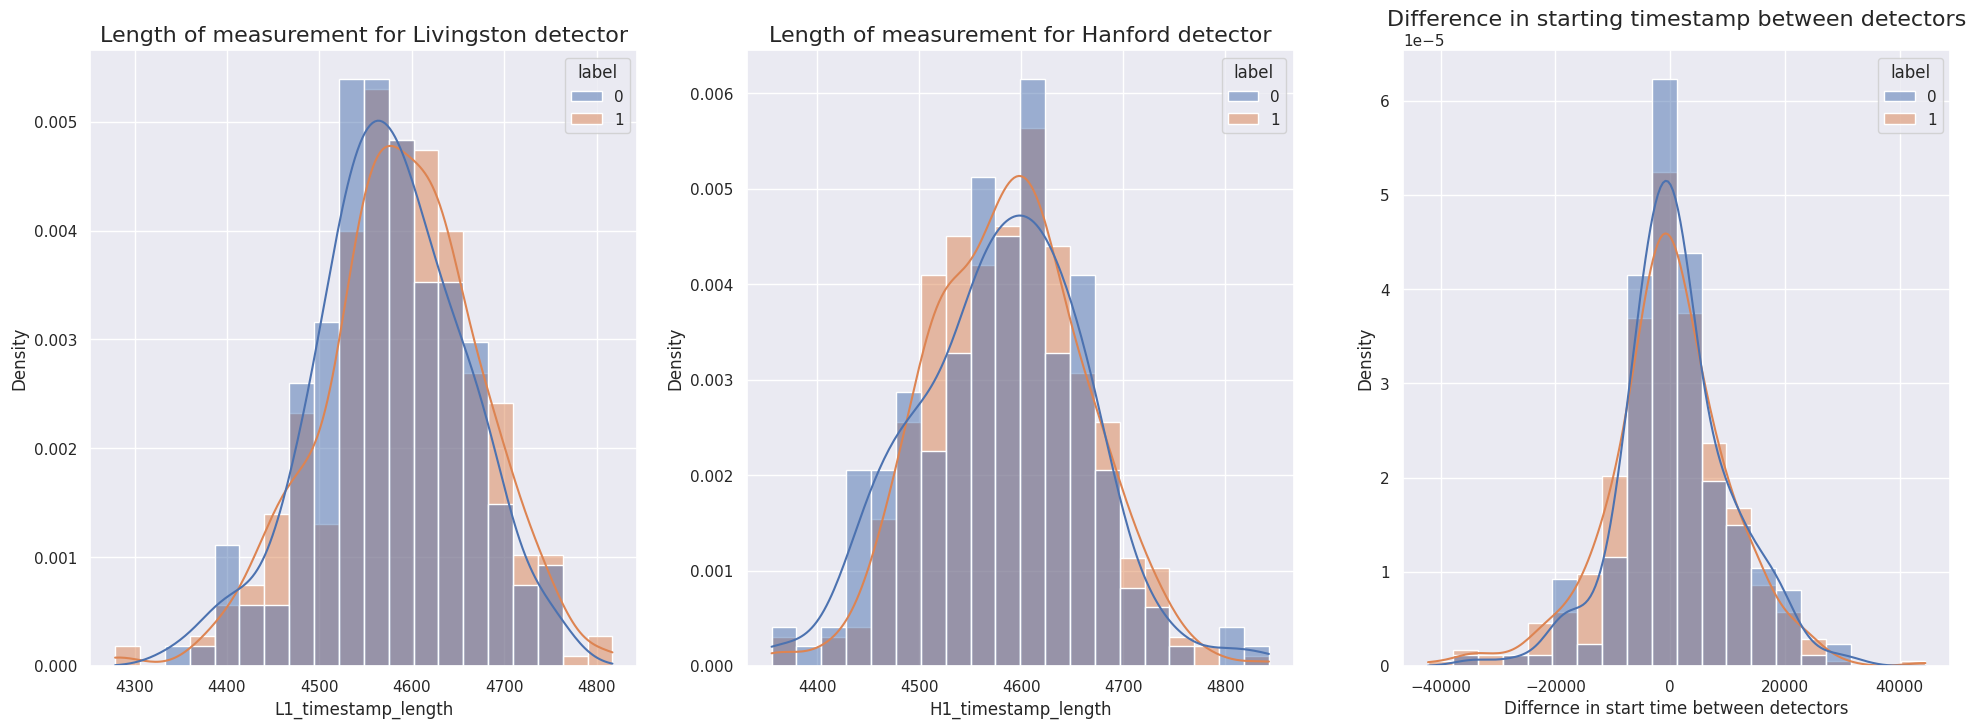

In [34]:
sns.set_theme()

fig, ax = plt.subplots(1,3, figsize=(24,8))
# fig.suptitle(f"In the plots the distribution of timestamps for both classes are shown; 1 indicates a simulated CW present and 0 not present", fontsize=16)
sns.histplot(
        df, x="L1_timestamp_length", hue="label",
        stat="density", common_norm=False, bins=20, ax=ax[0], kde=True).set_title('Length of measurement for Livingston detector', fontsize=16);

sns.histplot(
        df, x="H1_timestamp_length", hue="label",
        stat="density", common_norm=False, bins=20, ax=ax[1], kde=True).set_title('Length of measurement for Hanford detector', fontsize=16);

sns.histplot(
        df, x="Differnce in start time between detectors", hue="label",
        stat="density", common_norm=False, bins=20, ax=ax[2], kde=True).set_title('Difference in starting timestamp between detectors', fontsize=16);

## Frequency Analysis

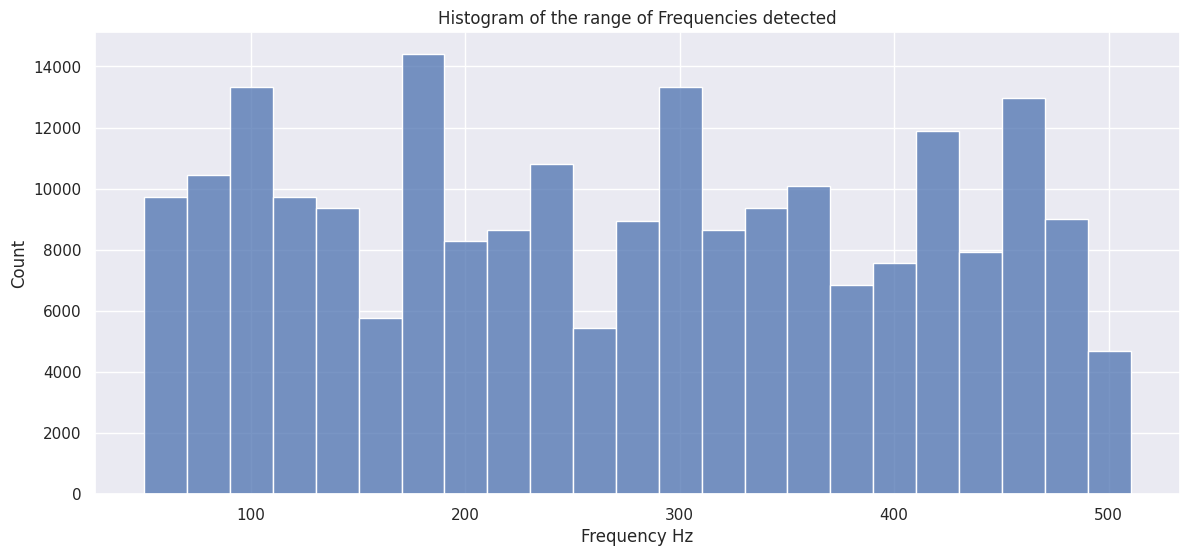

In [35]:
plt.figure(figsize=(14,6))
sns.histplot(x=list(np.hstack(freq)), binwidth=20)
plt.title('Histogram of the range of Frequencies detected');
plt.xlabel('Frequency Hz')
plt.show()